In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [89]:
from __future__ import division
import os,shutil,glob,re
import string
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


In [1]:
rootdir = './brown'
os.chdir(rootdir)
outfilename = "brown.txt"
prevdir = '../'
with open(prevdir+outfilename, 'wb') as outfile:
    for filename in glob.glob('*'):
        if filename == outfilename:
            continue
        with open(filename, 'rb') as readfile:
            shutil.copyfileobj(readfile, outfile)
os.chdir(prevdir)

In [111]:
def data_cleaning(file_name):
    file = open(file_name,"r",encoding='utf-8')
    text= file.read()
    file.close()
    words_list = text.split()
    tokenized_words = [w.split('/')[0] for w in words_list]
    clean_words_list = [word.lower() for word in tokenized_words]
    return clean_words_list

In [112]:
clean_words = data_cleaning('brown.txt')
clean_words_set = set(clean_words) 
unique_clean_words = (list(clean_words_set))
counter_pairs = Counter(zip(clean_words, clean_words[1:]))
counter_pairs = dict(counter_pairs)
freq_the = counts['the']
freq_in = counts['in']

In [113]:
dict_the_freq = {}
dict_in_freq = {}
for k,v in counter_pairs.items():
    if(k[0]=='the'):
        dict_the_freq[k[1]]=v
    if(k[0]=='in'):
        dict_in_freq[k[1]]=v
absent_word_dict_the_freq = np.setdiff1d(unique_clean_words,list(dict_the_freq.keys()))
absent_word_dict_in_freq = np.setdiff1d(unique_clean_words,list(dict_in_freq.keys()))
dict_the_freq.update(dict((el,0) for el in absent_word_dict_the_freq))
dict_in_freq.update(dict((el,0) for el in absent_word_dict_in_freq))

        
        


### Conditional Probability Distribution

In [114]:
dict_the_prob = {}
dict_in_prob = {}
dict_the_prob = {k: v / freq_the for k, v in dict_the_freq.items()}
dict_in_prob = {k: v / freq_in for k, v in dict_in_freq.items()}


### Frequency Distribution

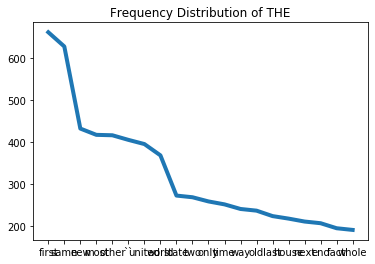

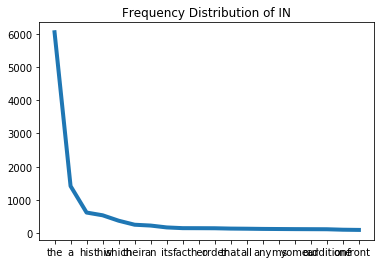

Top 20 words in "THE" distribution along with their frequency count


{'first': 662, 'same': 628, 'new': 432, 'most': 417, 'other': 416, '``': 405, 'united': 395, 'world': 368, 'state': 272, 'two': 268, 'only': 258, 'time': 251, 'way': 240, 'old': 236, 'last': 223, 'house': 217, 'next': 210, 'end': 206, 'fact': 194, 'whole': 190}


Top 20 words in "IN" distribution along with their frequency count


{'the': 6044, 'a': 1420, 'his': 623, 'this': 541, 'which': 378, 'their': 257, 'an': 232, 'its': 176, 'fact': 154, 'her': 153, 'order': 151, 'that': 141, 'all': 137, 'any': 131, 'my': 128, 'some': 125, 'our': 123, 'addition': 121, 'one': 107, 'front': 101}


In [119]:
from operator import itemgetter
top_20_the = dict(sorted(dict_the_freq.items(), key = itemgetter(1), reverse = True)[:20])
top_20_in = dict(sorted(dict_in_freq.items(), key = itemgetter(1), reverse = True)[:20])

plt.plot(list(top_20_the.keys()), list(top_20_the.values()),linewidth=4)
plt.title("Frequency Distribution of THE")
plt.show()

plt.plot(list(top_20_in.keys()), list(top_20_in.values()),linewidth=4)
plt.title("Frequency Distribution of IN")
plt.show()

print("Top 20 words in \"THE\" distribution along with their frequency count\n\n")
print(top_20_the)
print("\n\nTop 20 words in \"IN\" distribution along with their frequency count\n\n")
print(top_20_in)

In [116]:
import math
expected_value_the = 0 
expected_value_in = 0 
for k,v in dict_the_prob.items():
    if(v==0):
        continue
    expected_value_the = expected_value_the + v * math.log(v,2)
for k,v in dict_in_prob.items():
    if(v==0):
        continue
    expected_value_in = expected_value_in + v * math.log(v,2)

    
    
print("\n The expected value of \"The\" distrivbution = " +  str(-1 * expected_value_the) + "  \n")
print("\n The expected value of \"In\" distrivbution = " +  str(-1 * expected_value_in) + "  \n")



 The expected value of "The" distrivbution = 12.007142085205516  


 The expected value of "In" distrivbution = 7.459255872475821  

